In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score, adjusted_rand_score
from sklearn.datasets import load_iris
import warnings
import os

# Ignorar avisos futuros para uma saída mais limpa
warnings.filterwarnings('ignore')

# Cria o diretório para salvar as imagens, se não existir
output_dir = 'outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(">>> Ambiente configurado. Bibliotecas importadas e pasta 'outputs' garantida.")

>>> Ambiente configurado. Bibliotecas importadas e pasta 'outputs' garantida.


In [ ]:
# ETAPA 1 (PARTE 1): Carregamento dos Dados
# URL ATUALIZADA para a fonte original e estável do dataset.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

# O separador para este arquivo é o ponto e vírgula (;)
df = pd.read_csv(url, sep=';')

print("Dataset carregado com sucesso.")
display(df.head())

Dataset carregado com sucesso.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# ETAPA 1 (PARTE 2): Análise Exploratória Textual
print("Informações Gerais do DataFrame:")
df.info()

print("\nEstatísticas Descritivas:")
display(df.describe())

Informações Gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

Estatísticas Descritivas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Gerando gráfico da distribuição da qualidade do vinho...


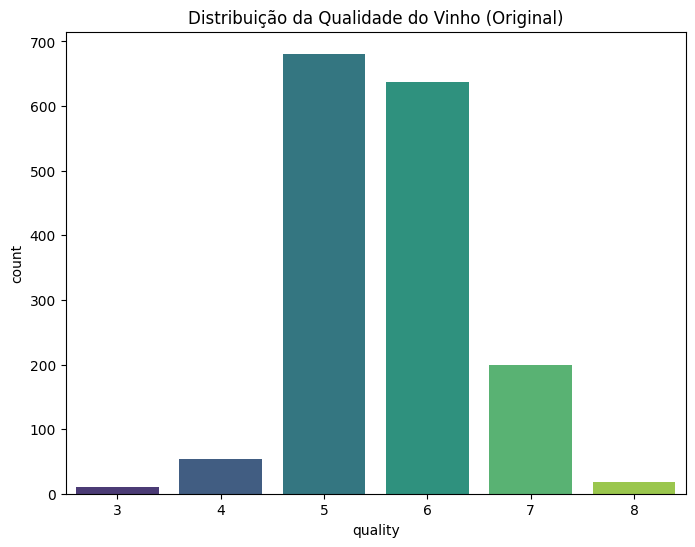

In [5]:
# ETAPA 1 (PARTE 3): Análise Exploratória Visual
print("Gerando gráfico da distribuição da qualidade do vinho...")
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribuição da Qualidade do Vinho (Original)')

# Salvando a imagem
plt.savefig(f'{output_dir}/1_distribuicao_qualidade.png', dpi=300, bbox_inches='tight')
plt.show()

Gerando mapa de calor de correlações...


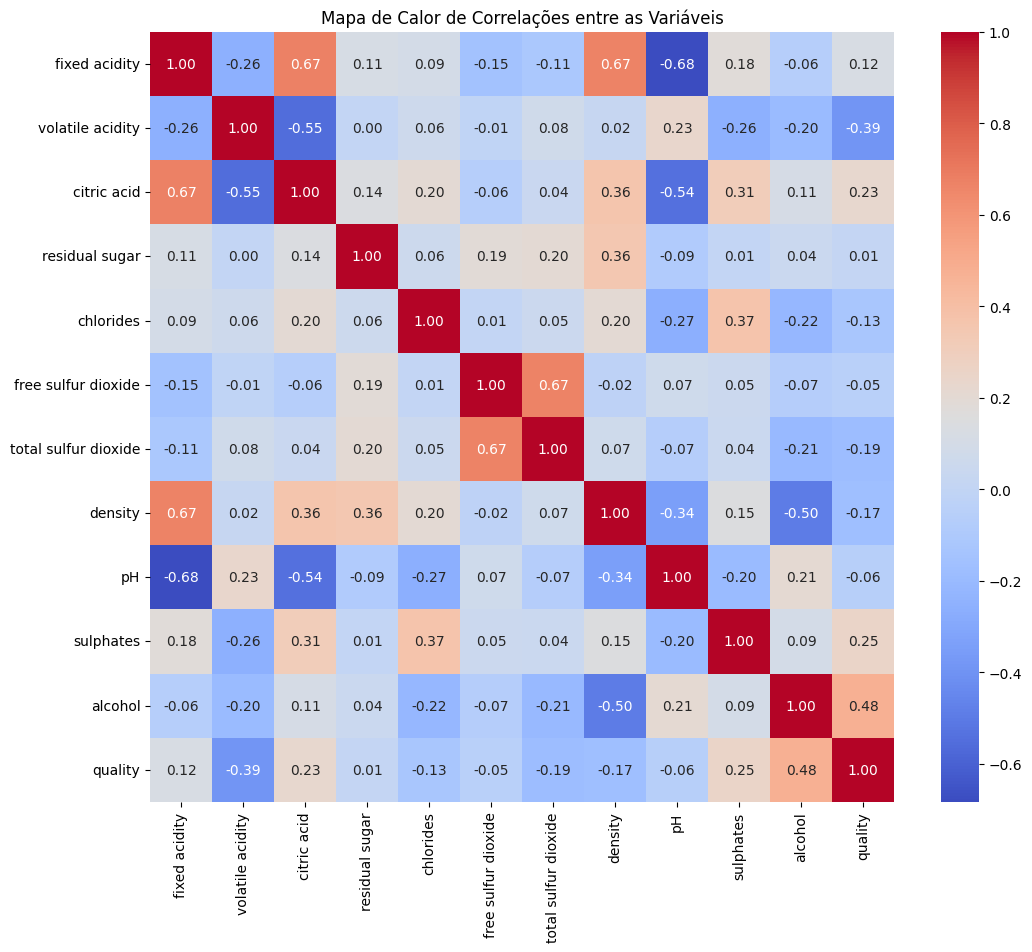

In [6]:
# ETAPA 1 (PARTE 4): Análise Exploratória Visual
print("Gerando mapa de calor de correlações...")
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mapa de Calor de Correlações entre as Variáveis')

# Salvando a imagem
plt.savefig(f'{output_dir}/2_mapa_correlacao.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# ETAPA 2: Pré-processamento
print("Realizando engenharia de feature e padronização...")
# Criando a variável alvo binária (1 = Bom, 0 = Regular)
df['quality_category'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)
df_processed = df.drop('quality', axis=1)

# Separando features (X) e target (y)
X = df_processed.drop('quality_category', axis=1)
y = df_processed['quality_category']

# Normalização (Padronização) dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Pré-processamento concluído.")
print("Shape de X_scaled:", X_scaled.shape)

Realizando engenharia de feature e padronização...
Pré-processamento concluído.
Shape de X_scaled: (1599, 11)


In [8]:
# ETAPA 3: Divisão dos Dados
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treino: 1279 amostras
Tamanho do conjunto de teste: 320 amostras


In [9]:
# ETAPA 4: Treinamento dos Modelos

# --- Modelo 1: Árvore de Decisão ---
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
print(">>> Modelo Árvore de Decisão treinado.")

# --- Modelo 2: K-Vizinhos mais Próximos (KNN) ---
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
print(">>> Modelo KNN treinado.")

# --- Modelo 3: K-Means ---
kmeans_model = KMeans(n_clusters=2, n_init='auto', random_state=42)
kmeans_model.fit(X_train)
print(">>> Modelo K-Means treinado.")

>>> Modelo Árvore de Decisão treinado.
>>> Modelo KNN treinado.
>>> Modelo K-Means treinado.


--- Avaliação: Árvore de Decisão ---
Acurácia: 0.7562
              precision    recall  f1-score   support

     Regular       0.74      0.73      0.74       149
         Bom       0.77      0.78      0.77       171

    accuracy                           0.76       320
   macro avg       0.76      0.75      0.75       320
weighted avg       0.76      0.76      0.76       320


--- Avaliação: KNN ---
Acurácia: 0.7344
              precision    recall  f1-score   support

     Regular       0.71      0.72      0.72       149
         Bom       0.75      0.75      0.75       171

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.73      0.73      0.73       320



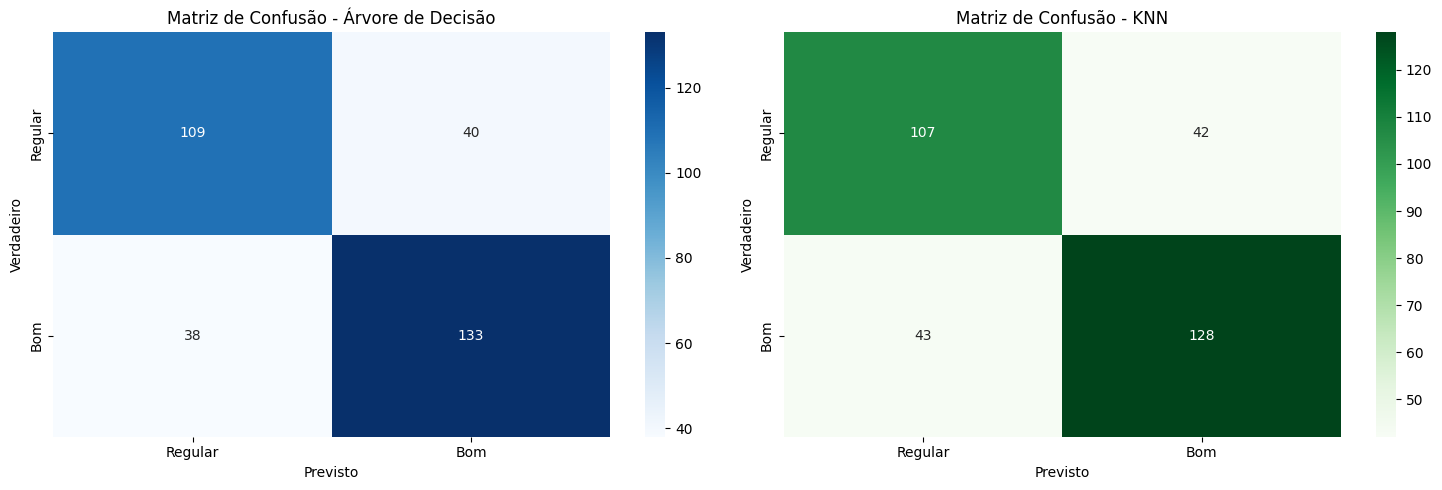

In [10]:
# ETAPA 5 (PARTE 1): Avaliação dos Modelos Supervisionados
print("--- Avaliação: Árvore de Decisão ---")
y_pred_dt = dt_model.predict(X_test)
print(f"Acurácia: {accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt, target_names=['Regular', 'Bom']))

print("\n--- Avaliação: KNN ---")
y_pred_knn = knn_model.predict(X_test)
print(f"Acurácia: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn, target_names=['Regular', 'Bom']))

# Matrizes de Confusão para comparação
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Regular', 'Bom'], yticklabels=['Regular', 'Bom'], ax=axes[0])
axes[0].set_title('Matriz de Confusão - Árvore de Decisão')
axes[0].set_xlabel('Previsto'); axes[0].set_ylabel('Verdadeiro')
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', xticklabels=['Regular', 'Bom'], yticklabels=['Regular', 'Bom'], ax=axes[1])
axes[1].set_title('Matriz de Confusão - KNN')
axes[1].set_xlabel('Previsto'); axes[1].set_ylabel('Verdadeiro')

plt.tight_layout()
# Salvando a imagem
plt.savefig(f'{output_dir}/3_matrizes_confusao.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# ETAPA 5 (PARTE 2): Avaliação do Modelo Não Supervisionado
print("--- Avaliação: K-Means ---")
kmeans_clusters_test = kmeans_model.predict(X_test)

# Score de Silhueta (qualidade intrínseca dos clusters)
silhouette = silhouette_score(X_test, kmeans_clusters_test)
print(f"Score de Silhueta (nos dados de teste): {silhouette:.4f}")

# Adjusted Rand Score (comparando clusters com as classes reais)
rand_score = adjusted_rand_score(y_test, kmeans_clusters_test)
print(f"Adjusted Rand Score (comparando com rótulos reais): {rand_score:.4f}")

--- Avaliação: K-Means ---
Score de Silhueta (nos dados de teste): 0.2145
Adjusted Rand Score (comparando com rótulos reais): 0.0253
